<a href="https://colab.research.google.com/github/Davron030901/Machine_Learning/blob/main/penguin_semi_supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Load and Prepare Data

In [2]:
# Load and prepare the penguins dataset
penguins = sns.load_dataset('penguins')

# Drop rows with missing values
penguins = penguins.dropna()

# Prepare features and target
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins['species']

# Display first few rows of the dataset
print("Dataset shape:", penguins.shape)
penguins.head()

Dataset shape: (333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [3]:
adelie = penguins.loc[penguins['species'] == 'Adelie']


In [4]:
chin = penguins.loc[penguins['species'] == 'Chinstrap']


In [5]:
gentoo = penguins.loc[penguins['species'] == 'Gentoo']

In [6]:
groups_l = pd.concat([adelie.nlargest(10, 'body_mass_g'), chin.nlargest(10, 'body_mass_g'), gentoo.nlargest(10, 'body_mass_g')])
groups_l

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
109,Adelie,Biscoe,43.2,19.0,197.0,4775.0,Male
101,Adelie,Biscoe,41.0,20.0,203.0,4725.0,Male
81,Adelie,Torgersen,42.9,17.6,196.0,4700.0,Male
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
39,Adelie,Dream,39.8,19.1,184.0,4650.0,Male
45,Adelie,Dream,39.6,18.8,190.0,4600.0,Male
111,Adelie,Biscoe,45.6,20.3,191.0,4600.0,Male
17,Adelie,Torgersen,42.5,20.7,197.0,4500.0,Male
133,Adelie,Dream,37.5,18.5,199.0,4475.0,Male
69,Adelie,Torgersen,41.8,19.4,198.0,4450.0,Male


In [7]:
groups_s = pd.concat([adelie.nsmallest(10, 'body_mass_g'), chin.nsmallest(10, 'body_mass_g'), gentoo.nsmallest(10, 'body_mass_g')])
groups_s

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,Female
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,Female
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,Female
104,Adelie,Biscoe,37.9,18.6,193.0,2925.0,Female
44,Adelie,Dream,37.0,16.9,185.0,3000.0,Female
144,Adelie,Dream,37.3,16.8,192.0,3000.0,Female
68,Adelie,Torgersen,35.9,16.6,190.0,3050.0,Female
124,Adelie,Torgersen,35.2,15.9,186.0,3050.0,Female


## Preprocess the Data

In [8]:
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

## Create Partially Labeled Dataset

In [9]:
# Create a mask to simulate unlabeled data (set 70% of training labels as unknown)
n_samples = len(y_train)
n_unlabeled = int(0.7 * n_samples)
unlabeled_mask = np.random.choice(n_samples, n_unlabeled, replace=False)

# Create partially labeled training data
y_train_partial = y_train.copy()
y_train_partial[unlabeled_mask] = -1  # -1 represents unlabeled data

print("Total training samples:", n_samples)
print("Number of unlabeled samples:", n_unlabeled)
print("Number of labeled samples:", n_samples - n_unlabeled)

Total training samples: 266
Number of unlabeled samples: 186
Number of labeled samples: 80


## Train Semi-supervised Learning Models

In [10]:
# Initialize the semi-supervised learning models
label_prop_model = LabelPropagation(kernel='rbf', gamma=10, n_neighbors=7)
label_spread_model = LabelSpreading(kernel='rbf', gamma=10, n_neighbors=7)

# Train the models
label_prop_model.fit(X_train, y_train_partial)
label_spread_model.fit(X_train, y_train_partial)

LabelSpreading(gamma=10)

## Evaluate Model Performance

In [11]:
# Make predictions
y_pred_prop = label_prop_model.predict(X_test)
y_pred_spread = label_spread_model.predict(X_test)


In [12]:
# Print results
print("Label Propagation Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_prop))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_prop,
                          target_names=le.classes_))

print("\nLabel Spreading Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_spread))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_spread,
                          target_names=le.classes_))

Label Propagation Results:
Accuracy: 0.9850746268656716

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        31
   Chinstrap       1.00      0.92      0.96        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67


Label Spreading Results:
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



## Visualize Results

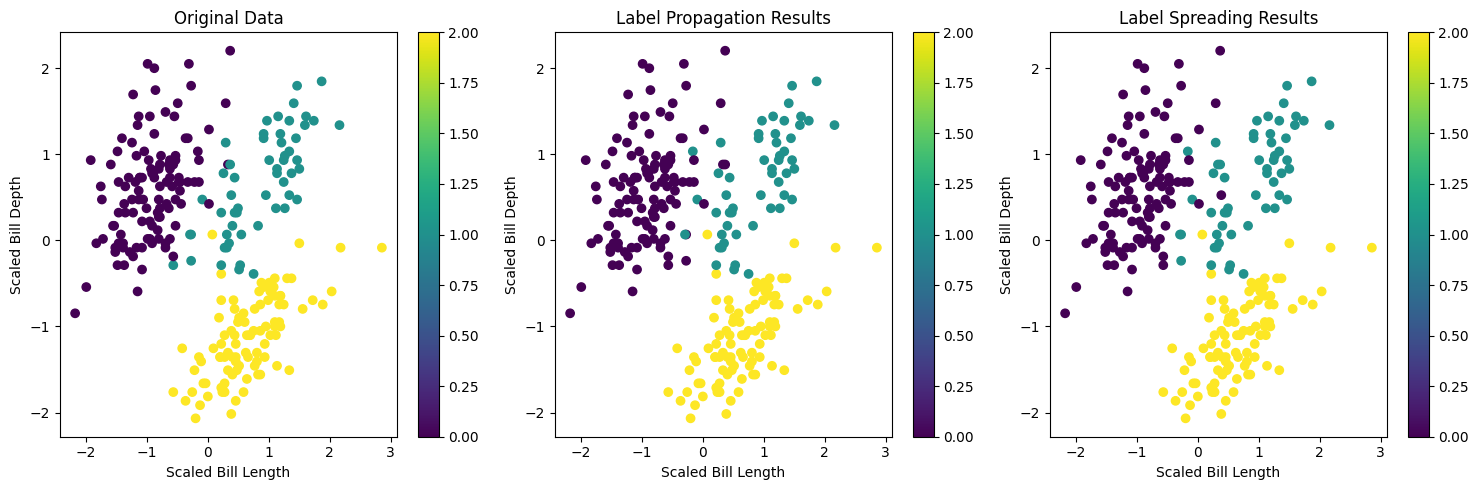

In [13]:
# Visualize the results using the first two features
plt.figure(figsize=(15, 5))

# Original Data
plt.subplot(131)
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                     cmap='viridis')
plt.title('Original Data')
plt.xlabel('Scaled Bill Length')
plt.ylabel('Scaled Bill Depth')
plt.colorbar(scatter)

# Label Propagation Results
plt.subplot(132)
scatter = plt.scatter(X_train[:, 0], X_train[:, 1],
                     c=label_prop_model.transduction_,
                     cmap='viridis')
plt.title('Label Propagation Results')
plt.xlabel('Scaled Bill Length')
plt.ylabel('Scaled Bill Depth')
plt.colorbar(scatter)

# Label Spreading Results
plt.subplot(133)
scatter = plt.scatter(X_train[:, 0], X_train[:, 1],
                     c=label_spread_model.transduction_,
                     cmap='viridis')
plt.title('Label Spreading Results')
plt.xlabel('Scaled Bill Length')
plt.ylabel('Scaled Bill Depth')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

## Plot Decision Boundaries

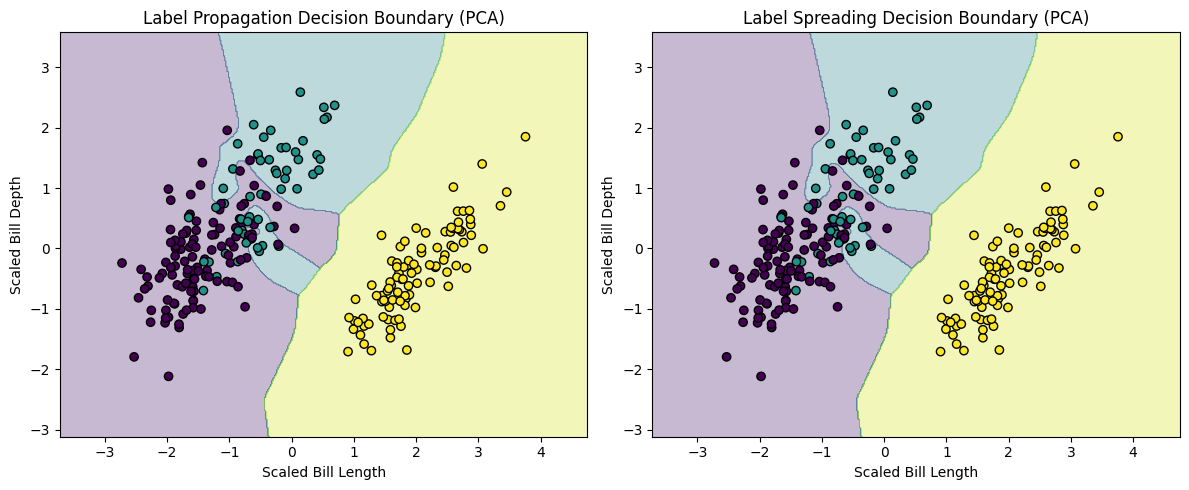

In [17]:
# Reduce to 2D
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

# Retrain models on reduced data
label_prop_model = LabelPropagation()
label_prop_model.fit(X_train_2d, y_train)

label_spread_model = LabelSpreading()
label_spread_model.fit(X_train_2d, y_train)

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(121)
plot_decision_boundary(label_prop_model, X_train_2d, X_train_2d, y_train,
                       'Label Propagation Decision Boundary (PCA)')

plt.subplot(122)
plot_decision_boundary(label_spread_model, X_train_2d, X_train_2d, y_train,
                       'Label Spreading Decision Boundary (PCA)')

plt.tight_layout()
plt.show()

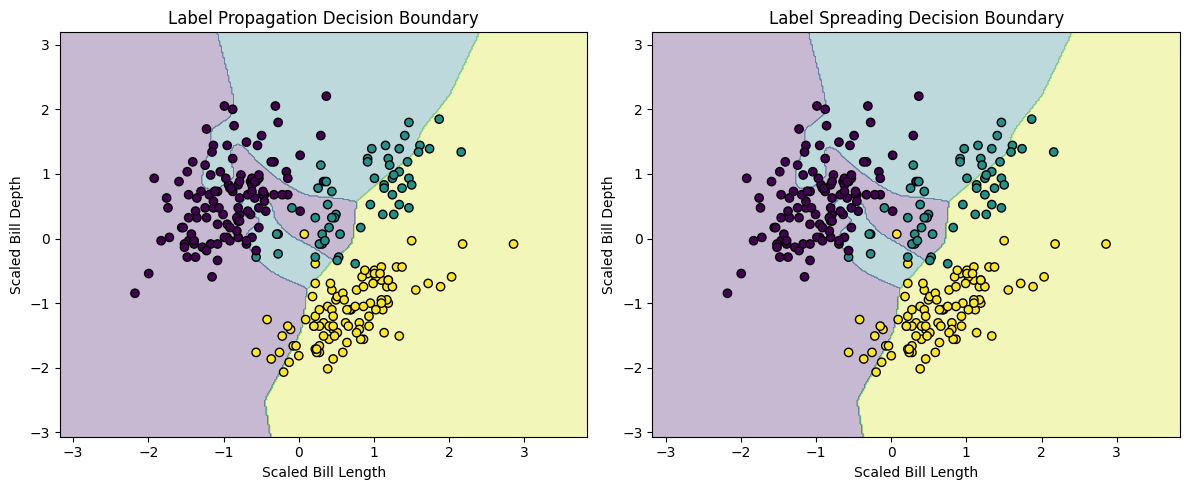

In [18]:
def plot_decision_boundary(model, X_2d, y, title):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Use only the 2D data for prediction
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', edgecolors='black')
    plt.title(title)
    plt.xlabel('Scaled Bill Length')
    plt.ylabel('Scaled Bill Depth')

# Plot decision boundaries
plt.figure(figsize=(12, 5))

plt.subplot(121)
plot_decision_boundary(label_prop_model, X_train[:, :2], y_train,
                       'Label Propagation Decision Boundary')

plt.subplot(122)
plot_decision_boundary(label_spread_model, X_train[:, :2], y_train,
                       'Label Spreading Decision Boundary')

plt.tight_layout()
plt.show()